Hands on ML chapter 1 

In [19]:
import os
import tarfile
import urllib
import numpy as np

In [20]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

Function to download housing data file, and extract the CSV

In [21]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [22]:
import pandas as pd

Function to load CSV into dataframe

In [23]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path =  os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

Housing data load

In [24]:
housing = fetch_housing_data()

In [25]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [27]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [28]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


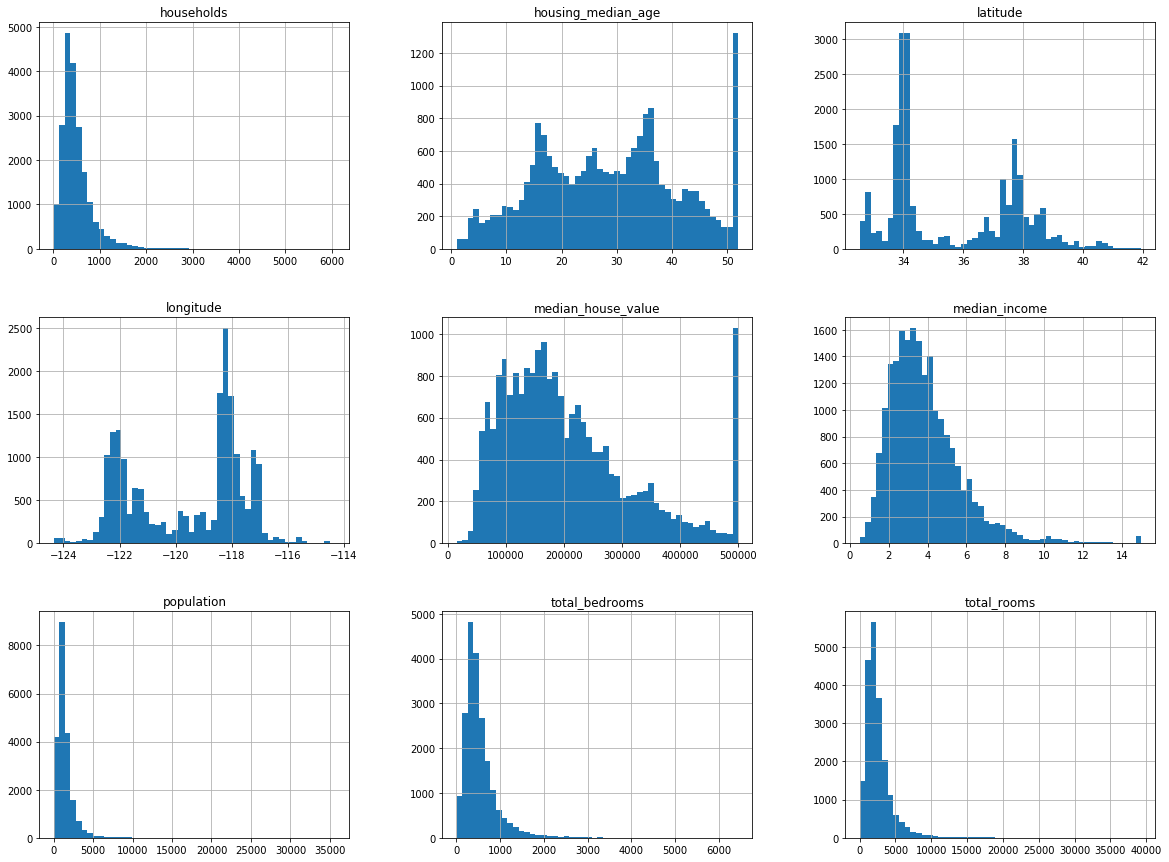

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Splitting into test and train datasets


In [62]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) #random array the size of the data (to cover all the data points)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size] #Test values are from row 0 to 80% of dataset, in the random index
    train_indices = shuffled_indices[test_set_size:] #similar to above, up to 20%
    #print(train_indices)
    #print (data.iloc[train_indices]) 
    return data.iloc[train_indices], data.iloc[test_indices] #Returns rows with the index values from above to each test/train group

In [63]:
train_set, test_set = split_train_test(housing, .2)

In [64]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8725,-118.36,33.83,35.0,2828.0,487.0,1439.0,490.0,5.6013,350200.0,<1H OCEAN
9851,-121.88,36.60,30.0,1671.0,469.0,760.0,375.0,2.5164,178100.0,<1H OCEAN
11811,-121.05,38.92,34.0,2144.0,372.0,899.0,378.0,3.3021,158800.0,INLAND
4846,-118.31,34.02,52.0,1173.0,284.0,814.0,295.0,2.4500,111400.0,<1H OCEAN
15398,-117.15,33.20,16.0,2690.0,459.0,1253.0,393.0,4.0328,294600.0,<1H OCEAN


In [70]:
from zlib import crc32 #compression library https://docs.python.org/3/library/zlib.html
def test_set_check(identifier, test_ratio): 
    #print(crc32(np.int64(identifier)))
    return crc32(np.int64(identifier)) #Checked with Jake, he just got excited about 'hash', I just need to google it at some point. 

In [71]:
def split_train_test_by_id(data, test_ratio, id_column): #this 
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set] # ~ is a vectorized "NOT" (& for and, | for or)

In [74]:
housing_with_id = housing.reset_index() # adds an 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

884750029
3170697299
3057125706
2056391124
4095544887
951520937
1683640184
2834321382
645875717
3939846299
3759161730
750403868
2721400575
1855932001
3082769613
2064995411
4120531888
959468334
871717431
4284439209
1909480778
3178913236
417431123
3561717453
1522825518
2523822512
2628481193
1342271543
3733878740
304379722
3406063078
128869752
2300666523
1166762501
1330539292
2212785026
225143905
3250679039
3884608025
723544711
2779737444
1761963514
1673553123
2942985341
568681374
3981402880
879718828
4173689138
1984591569
3135272527
2955247446
2089779144
4060117035
1051359413
2603703090
1469799340
3641990223
364797137
528176584
3553711446
1566462645
2448708139
1221869703
2222866457
183584762
3327870820
3432926845
3428067
2394638592
1108429214
519833679
3528853713
1557729074
2423459756
2595620533
1444677163
3633512904
339280214
3440972794
28513124
2403079303
1133909017
1230183680
2247695774
192289405
3353090787
1648834916
2934782458
543309337
3972546183
3859625886
715601664
2754097379
175

KeyError: "None of [Int64Index([-1696784234, -2844319736,  -654825493, -3954038923, -3781742996,\n             -767742222, -2739787503, -1877464689, -3066545373, -2054014019,\n            ...\n            -2937621417, -1672645431, -3130169755, -1983420677, -4172783336,\n             -874356346, -1054381921, -4067596287, -2096992286, -2958528644],\n           dtype='int64', length=20640)] are in the [index]"

In [76]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

8741890
1302977968
135721302
3007681661
4041723527
1581169054
135721302
2698178643
4143626395
4143626395
1327512377
4126409621
2149869673
3910486896
997657922
4126409621
1278115895
4161522135
3148452653
2135915555
4148141793
3920995248
1478741890
997657922
2073663307
1867666681
3556848082
3263535342
2531441320
1846773113
1018125604
1757970274
3417094596
256530122
1757970274
2419671219
1757970274
2659863042
1257601580
1040360599
3108376931
1015089047
615949338
2224988751
1243458712
3834028156
1243458712
1382166881
1164673107
2033479416
601900559
1398905628
3077696552
4020819372
3671351204
3594736194
707198214
3336211810
3556605582
1988415028
1636252303
3671351204
3671351204
3671351204
1259619180
3950919364
3671351204
1988415028
3816661943
722223455
1564281742
1870023619
3780748512
1870023619
752095545
4273362699
3265365972
3274103379
3274103379
391768701
3797360622
3920995248
47446095
47446095
2808923378
2309857667
2379981355
521471469
872489353
872489353
872489353
2379981355
2379981355

KeyError: "None of [Int64Index([-3501309566, -1097966262, -1785038546, -2120796517, -2120796517,\n            -2120796517, -2120796517, -2120796517, -1810029399, -2120796517,\n            ...\n            -3684011557, -1015759391,   -10261186,  -109176030, -2529600915,\n            -1801858221, -1305459064, -3692012992, -3684011557, -3716741177],\n           dtype='int64', length=20640)] are in the [index]"

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Stratified Sampling